In [25]:
import pandas as pd
df=pd.DataFrame()

In [26]:
df=pd.read_csv('supela.csv', index_col='date',parse_dates=True)

<ipython-input-26-40f6b983bbf1>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df=pd.read_csv('supela.csv', index_col='date',parse_dates=True)


<Axes: xlabel='date'>

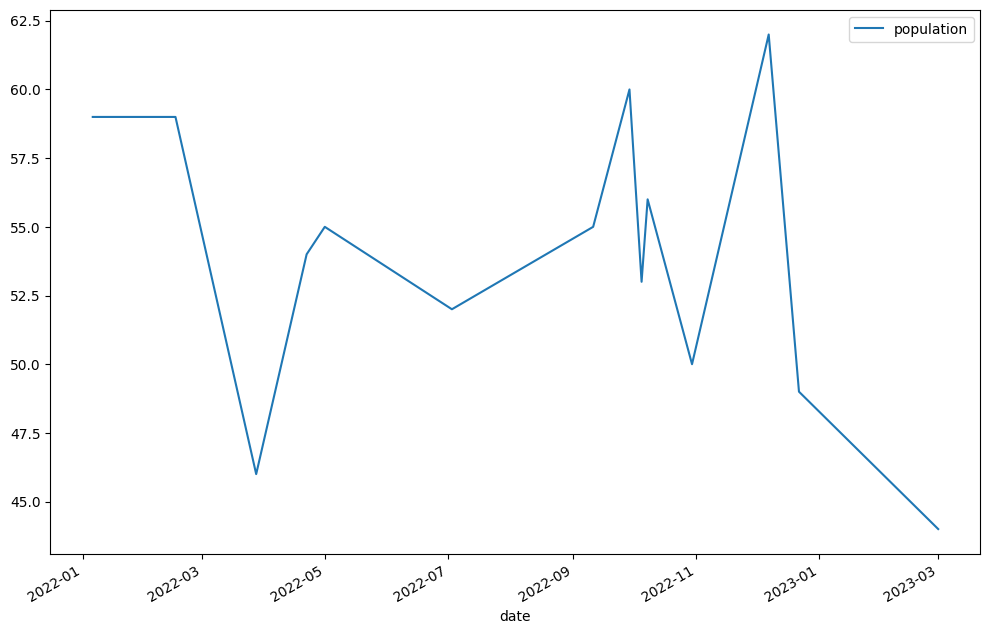

In [27]:
df.columns = ['population']
df.plot(figsize=(12,8))

In [28]:
df['population_LastMonth']=df['population'].shift(+1)
df['population_2Monthsback']=df['population'].shift(+2)
df['population_3Monthsback']=df['population'].shift(+3)
df

,population,population_LastMonth,population_2Monthsback,population_3Monthsback
date,,,,
2022-05-01,55,NaN,NaN,NaN
2022-02-16,59,55.0,NaN,NaN
2022-07-03,52,59.0,55.0,NaN
2022-03-28,46,52.0,59.0,55.0
2022-04-22,54,46.0,52.0,59.0
2022-10-05,53,54.0,46.0,52.0
2022-01-06,59,53.0,54.0,46.0
2022-12-07,62,59.0,53.0,54.0
2022-10-08,56,62.0,59.0,53.0


In [29]:
df=df.dropna()
df

,population,population_LastMonth,population_2Monthsback,population_3Monthsback
date,,,,
2022-03-28,46,52.0,59.0,55.0
2022-04-22,54,46.0,52.0,59.0
2022-10-05,53,54.0,46.0,52.0
2022-01-06,59,53.0,54.0,46.0
2022-12-07,62,59.0,53.0,54.0
2022-10-08,56,62.0,59.0,53.0
2022-09-29,60,56.0,62.0,59.0
2022-10-30,50,60.0,56.0,62.0
2022-09-11,55,50.0,60.0,56.0


In [30]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [31]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)


In [32]:
import numpy as np
x1,x2,x3,y=df['population_LastMonth'],df['population_2Monthsback'],df['population_3Monthsback'],df['population']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[52. 59. 55.]
 [46. 52. 59.]
 [54. 46. 52.]
 [53. 54. 46.]
 [59. 53. 54.]
 [62. 59. 53.]
 [56. 62. 59.]
 [60. 56. 62.]
 [50. 60. 56.]
 [55. 50. 60.]
 [49. 55. 50.]]


In [33]:
X_train,X_test,y_train,y_test=final_x[1:14],final_x[1:14],y[1:16],y[1:16]
print(X_train.shape)
print(y_train.shape)

(10, 3)
(10, 1)


In [34]:
lin_model.fit(X_train,y_train)

LinearRegression()

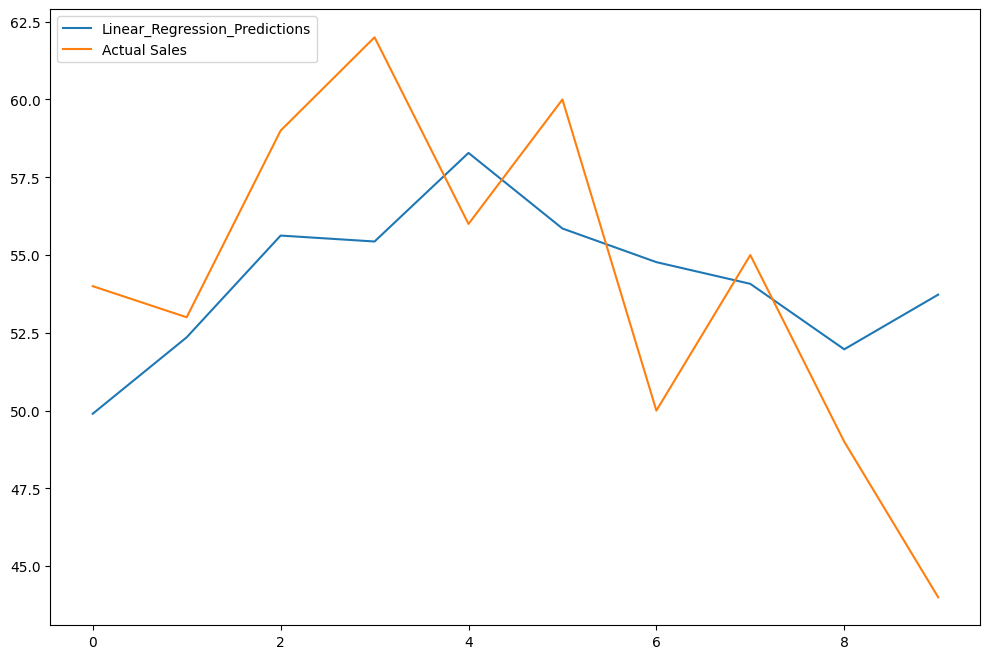

In [35]:
lin_pred=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

In [36]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))

In [37]:
print('Mean Squared Error for Linear Regression Model is:',rmse_lr)

Mean Squared Error for Linear Regression Model is: 4.703170329172584
